In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
from __future__ import division
%matplotlib inline

In [11]:
df = pd.read_csv('ethereum_dataset.csv', parse_dates=['Date_UTC'])


In [12]:
df.head()

,Date_UTC,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,2015-07-30,1438214400,0.0,8893,9205,72049306.59,0.0,23.7569,0.121,6912,1299,644,4.46,0.0,0,0,39316.09375,NaN
1,2015-07-31,1438300800,0.0,0,9361,72085498.31,0.0,48.1584,0.603,6863,511,582,12.58,0.0,0,0,36191.71875,NaN
2,2015-08-01,1438387200,0.0,0,9476,72113204.25,0.0,55.2709,0.887,5293,334,575,16.34,0.0,0,0,27705.93750,NaN
3,2015-08-02,1438473600,0.0,0,9563,72141427.69,0.0,64.1779,1.020,5358,394,581,16.12,0.0,0,0,28223.43750,NaN
4,2015-08-03,1438560000,0.0,0,9639,72169404.41,0.0,69.8559,1.126,5280,443,587,16.37,0.0,0,0,27976.71875,NaN


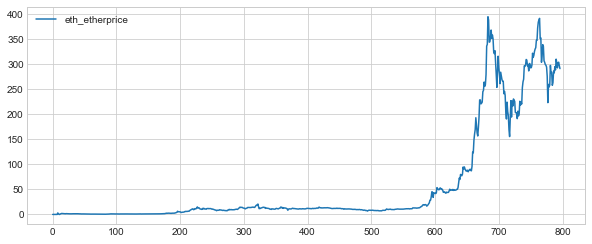

In [13]:
df[['eth_etherprice']].plot(legend=True,figsize=(10,4))

In [17]:
# Prepare for the Linear Model, Dependent variable = price, independent variable = all others except price and date
pricedf = pd.DataFrame(df['eth_etherprice'])
datedf = pd.DataFrame(df['Date_UTC'])
timedf = pd.DataFrame(df['UnixTimeStamp'])
df = df.drop('eth_etherprice',axis=1)
df = df.drop ('Date_UTC', axis = 1)
df = df.drop ('UnixTimeStamp', axis = 1)
df.head()

,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,8893,9205,72049306.59,0.0,23.7569,0.121,6912,1299,644,4.46,0.0,0,0,39316.09375,NaN
1,0,9361,72085498.31,0.0,48.1584,0.603,6863,511,582,12.58,0.0,0,0,36191.71875,NaN
2,0,9476,72113204.25,0.0,55.2709,0.887,5293,334,575,16.34,0.0,0,0,27705.93750,NaN
3,0,9563,72141427.69,0.0,64.1779,1.020,5358,394,581,16.12,0.0,0,0,28223.43750,NaN
4,0,9639,72169404.41,0.0,69.8559,1.126,5280,443,587,16.37,0.0,0,0,27976.71875,NaN


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [21]:
df = df.drop('eth_ens_register',axis = 1)
lm.fit(df,pricedf)

/Users/Mohit/Desktop/jupyter/jpnotebook/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print lm.intercept_

[-15.74809576]


In [34]:
print pd.DataFrame(zip(df.columns,lm.coef_[0]),columns=['columns','coefficients'])

            columns  coefficients
0            eth_tx -7.798709e-06
1       eth_address -2.269044e-06
2        eth_supply  1.282535e-07
3     eth_marketcap  1.083945e-02
4      eth_hashrate  5.865264e-05
5    eth_difficulty  4.544950e-04
6        eth_blocks  1.620541e-03
7        eth_uncles  4.061575e-04
8     eth_blocksize -8.566839e-06
9     eth_blocktime  1.152663e-01
10     eth_gasprice -1.443929e-13
11     eth_gaslimit  1.286799e-07
12      eth_gasused  1.376347e-10
13  eth_ethersupply -1.525251e-04


In [35]:
import statsmodels.formula.api as sm

In [36]:
df2 = pd.read_csv('ethereum_dataset.csv', parse_dates=['Date_UTC'])

In [47]:
result = sm.ols(formula="eth_etherprice ~ eth_hashrate + eth_difficulty + eth_blocks + eth_uncles + eth_blocksize + eth_blocktime + eth_gasprice + eth_gaslimit + eth_gasused + eth_ethersupply", data=df2).fit()

In [48]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:         eth_etherprice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        01:51:32   Log-Likelihood:                -3732.4
No. Observations:                 797   AIC:                             7487.
Df Residuals:                     786   BIC:                             7538.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -50.7648     79.280     

In [61]:
corr = df2.corr()

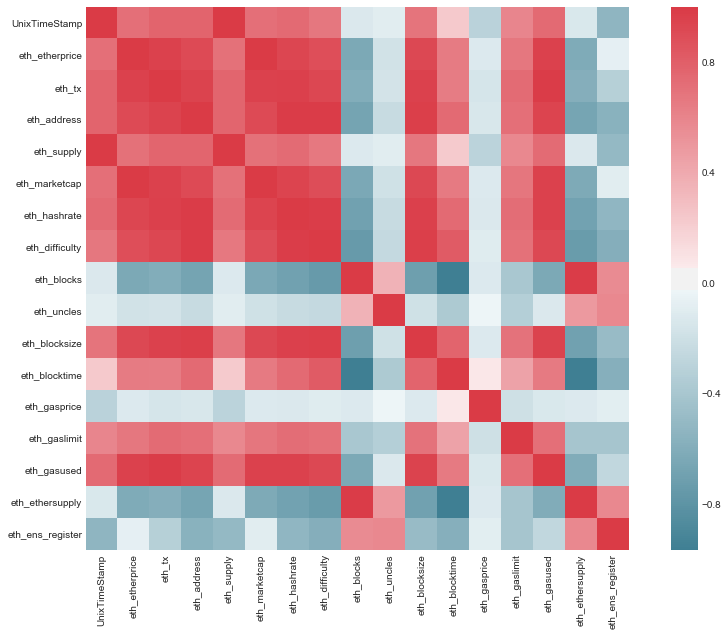

In [64]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)